In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from copy import copy, deepcopy
import matplotlib as mpl
import seaborn as sns

from models.geophysic_models.carbon_cycle_models import *
from models.geophysic_models.temperature_dynamic_model import *
from models.geophysic import *
from models.game_theory.benefit_function import *
from models.game_theory.damage_function import *
from models.game_theory.strategies import *

from models.game import *
from plot_function import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context("paper")
# plt.rcParams.update({
#     # "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"],
#     "figure.titlesize": 16})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
# sns.axes_style( { 'xtick.color': 'black',
#  'ytick.color': 'black',
#  'xtick.bottom': True,
#  'xtick.top': True,
#  'ytick.left': True,
#  'ytick.right': True})
# # mpl.rc('text', usetex=True)
# mpl.rc('ytick'  , labelsize=15)
# mpl.rc('xtick'  , labelsize=13)
# mpl.rc('legend' , fontsize= 15)
# mpl.rc('axes'   , labelsize=15,  titlesize=16) 
# plt.rcParams['font.size'] = '16'

carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

# Nombre de joueur 
N = 5

# Espaces d'action des joueurs en GtCO2

action_sets = np.array([[0.0, 12.0],        # China  
                        [0.0, 8.0],         # USA
                        [0.0, 5.0],         # EU
                        # [0.0, 4.0],         # India
                        [0.0, 7.0],         # Russia
                        [0.0, 9.0]])        # other Asia    

# Coefficient d'impact de la temperature sur le climat 

deltas = np.array([1.1847,
                    1.1941,
                    1.1248,
                    # 0.9074,
                    1.2866,
                    1.1847]) 

# PIB max des joueurs, j'ai pris le PIB 2020                

gdp_max = np.array([15.0,
                    18.0,
                    17.0,
                    # 2.6,
                    1.6,
                    26.0])*1

omegas = gdp_max/np.sum(gdp_max)

alpha =1


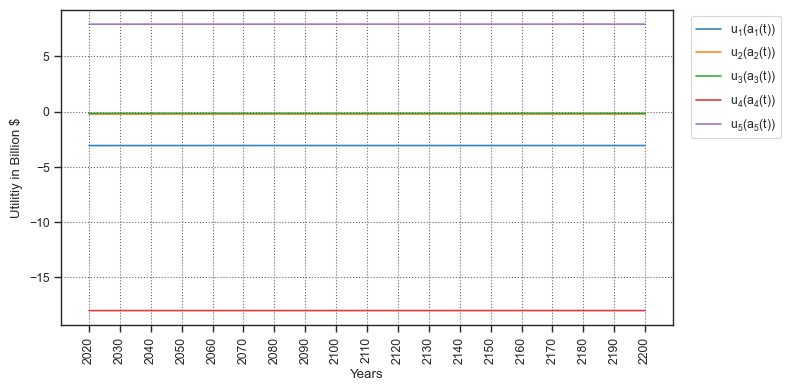

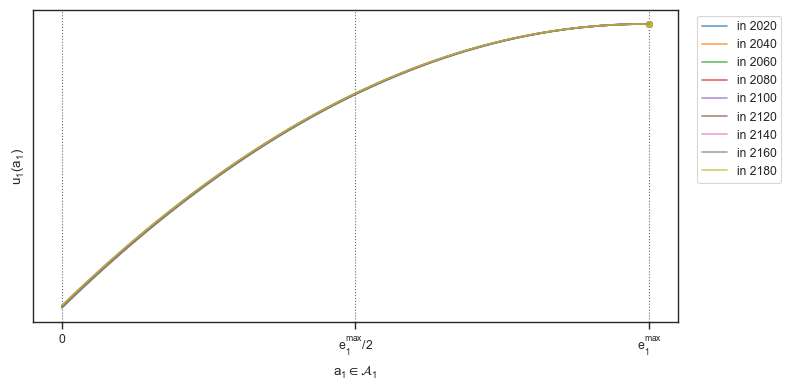

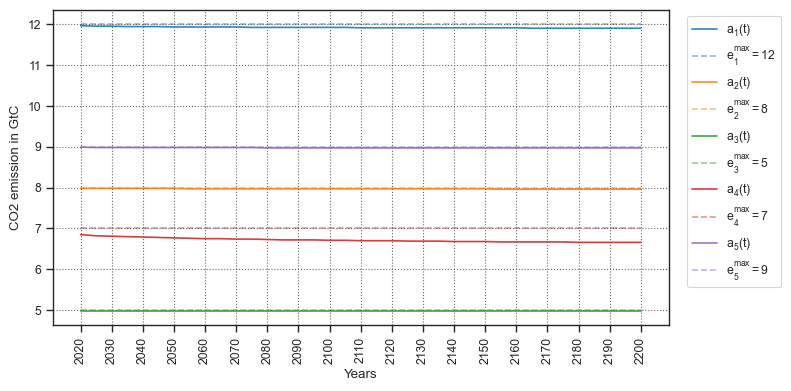

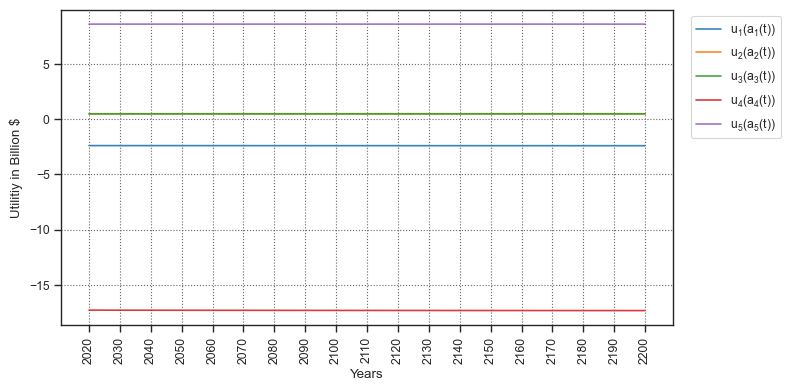

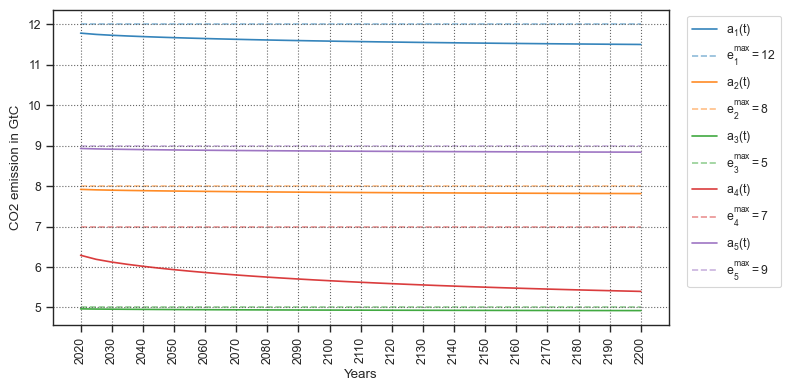

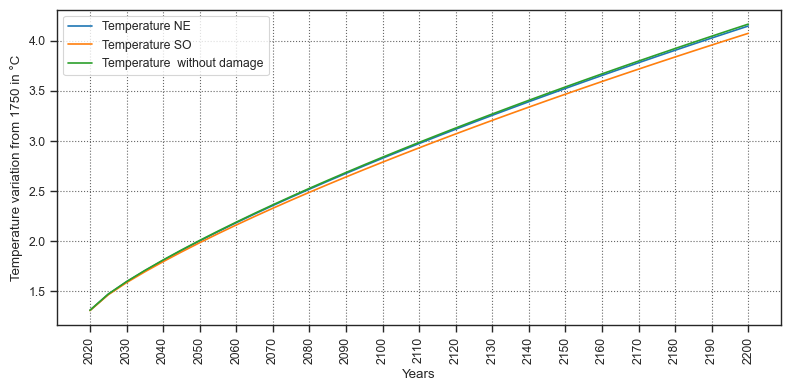

In [4]:
# puissance de la fonction damage 


# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-1,1.1])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1],0.3),
                                damage_function = damage_polynome(damage_coef),
                                impact_factor_of_temperature = deltas[i],
                                alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=(8,4), name='fig')

In [3]:
def tout_les_n(array, num):
    new = []
    for idx, item in enumerate(array):
        if idx%num ==0:
            new.append(item)
    return np.array(new)

## Social Optimum VS Nash Equilibrium with respect to time

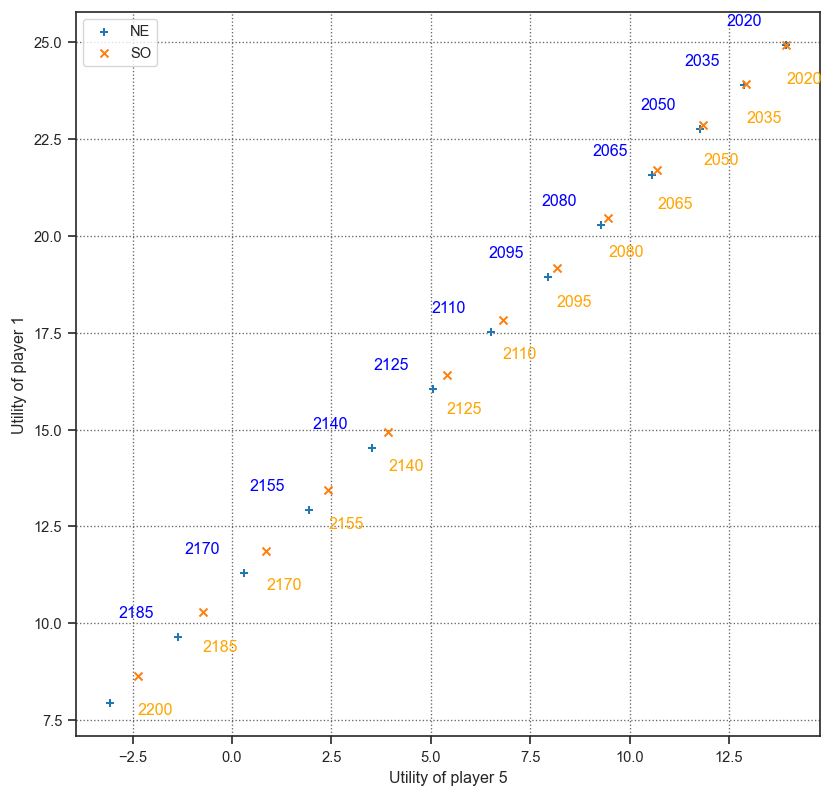

In [4]:
indice_1 = 0
indice_2 = 4
plt.figure(figsize=(8,8),dpi=120)
num = 3
t = np.arange(int(game.T/num)+1)*5*num + 2020



plt.scatter(tout_les_n(game.utilities_profiles[indice_1], num), tout_les_n(game.utilities_profiles[indice_2], num), marker='+',  label='NE')
plt.scatter(tout_les_n(game.so_utilities_profiles[indice_1], num), tout_les_n(game.so_utilities_profiles[indice_2], num),  marker='x', label='SO')
# plt.scatter(game.bau_utilities_profiles[indice_1],game.bau_utilities_profiles[indice_2], marker='s',  label='BAU')

for i, txt in enumerate(t):
    plt.annotate(txt, (tout_les_n(game.utilities_profiles[indice_1], num)[i]-1.5,tout_les_n(game.utilities_profiles[indice_2], num)[i]+0.5),c='blue')
    plt.annotate(txt, (tout_les_n(game.so_utilities_profiles[indice_1], num)[i], tout_les_n(game.so_utilities_profiles[indice_2], num)[i]-1),c='orange')
    # plt.annotate(txt, (game.bau_utilities_profiles[indice_1][i], game.bau_utilities_profiles[indice_2][i]-1),c='green')

plt.ylabel('Utility of player {}'.format(indice_1+1))
plt.xlabel('Utility of player {}'.format(indice_2+1))
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.show()

## Pareto Frontiere

In [42]:

from itertools import product
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from copy import copy, deepcopy
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm

from models.geophysic_models.carbon_cycle_models import *
from models.geophysic_models.temperature_dynamic_model import *
from models.geophysic import *
from models.game_theory.benefit_function import *
from models.game_theory.damage_function import *
from models.game_theory.strategies import *

from models.game import *
from plot_function import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context("paper")
# plt.rcParams.update({
#     # "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"],
#     "figure.titlesize": 16})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
# sns.axes_style( { 'xtick.color': 'black',
#  'ytick.color': 'black',
#  'xtick.bottom': True,
#  'xtick.top': True,
#  'ytick.left': True,
#  'ytick.right': True})
# # mpl.rc('text', usetex=True)
# mpl.rc('ytick'  , labelsize=15)
# mpl.rc('xtick'  , labelsize=13)
# mpl.rc('legend' , fontsize= 15)
# mpl.rc('axes'   , labelsize=15,  titlesize=16) 
# plt.rcParams['font.size'] = '16'

carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

# Nombre de joueur 
N = 5

# Espaces d'action des joueurs en GtCO2

action_sets = np.array([[0.0, 12.0],        # China  
                        [0.0, 8.0],         # USA
                        [0.0, 5.0],         # EU
                        # [0.0, 4.0],         # India
                        [0.0, 7.0],         # Russia
                        [0.0, 9.0]])        # other Asia    

# Coefficient d'impact de la temperature sur le climat 

deltas = np.array([1.1847,
                    1.1941,
                    1.1248,
                    # 0.9074,
                    1.2866,
                    1.1847]) 

# PIB max des joueurs, j'ai pris le PIB 2020                

gdp_max = np.array([15.0,
                    18.0,
                    17.0,
                    # 2.6,
                    1.6,
                    26.0])*1

omegas = gdp_max/np.sum(gdp_max)

alpha =1

In [43]:
percentage = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])/10
# percentage = np.array([0, 2, 4, 6, 8, 10])/10
# percentage = np.array([0, 5, 10])/10


# list_strategy = [dummy_one_shot_strat(percent) for percent in percentage]



product_strategy = product(percentage*action_sets[0,1],percentage*action_sets[1,1],percentage*action_sets[2,1],percentage*action_sets[3,1],percentage*action_sets[4,1])



list_product_strategy = np.array([list(x) for x in product_strategy], ndmin=3)
list_product_strategy_profile = np.moveaxis(np.moveaxis(np.repeat(list_product_strategy, repeats=T, axis=0), [0,1,2],[1,0,2]), [0,1,2], [0,2,1])

In [44]:
list_product_strategy_profile.shape

(161051, 5, 37)

In [45]:
list_product_strategy_profile[-1]

array([[12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
         7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
         7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  

In [46]:
list_action_player_1 = []
# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,-5,5])
damage_function = damage_polynome(damage_coef)

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefit_quadratic_concave_with_percentage_green(gdp_max[i], action_sets[i][1], percentage_green=0.2),
                                damage_function = damage_function,
                                impact_factor_of_temperature = deltas[i],
                                alpha=alpha) for i in range(N)]
                                
data = []
for strategy in tqdm(list_product_strategy_profile):
    game = Game(deepcopy(smc), list_players)
    game.repeated_one_shot_game_with_strategies_profile(strategy)
    data.append(game.strat_utilities_profiles)


100%|██████████| 161051/161051 [05:10<00:00, 517.93it/s]


In [ ]:
data

[array([[ 1.70345665e+00,  1.36556353e+00,  1.23609416e+00,
          1.14503268e+00,  1.05752883e+00,  9.66527411e-01,
          8.70665094e-01,  7.69840616e-01,  6.64278041e-01,
          5.54296747e-01,  4.40239135e-01,  3.22441977e-01,
          2.01223843e-01,  7.68798978e-02, -5.03196150e-02,
         -1.80129016e-01, -3.12325936e-01, -4.46709669e-01,
         -5.83099415e-01, -7.21332539e-01, -8.61262925e-01,
         -1.00275944e+00, -1.14570451e+00, -1.28999286e+00,
         -1.43553032e+00, -1.58223278e+00, -1.73002519e+00,
         -1.87884075e+00, -2.02862004e+00, -2.17931038e+00,
         -2.33086513e+00, -2.48324314e+00, -2.63640818e+00,
         -2.79032850e+00, -2.94497640e+00, -3.10032779e+00,
         -3.25636189e+00],
        [ 2.29316923e+00,  1.95259510e+00,  1.82209845e+00,
          1.73031445e+00,  1.64211630e+00,  1.55039283e+00,
          1.45376989e+00,  1.35214542e+00,  1.24574526e+00,
          1.13489132e+00,  1.01992872e+00,  9.01196898e-01,
          7.7

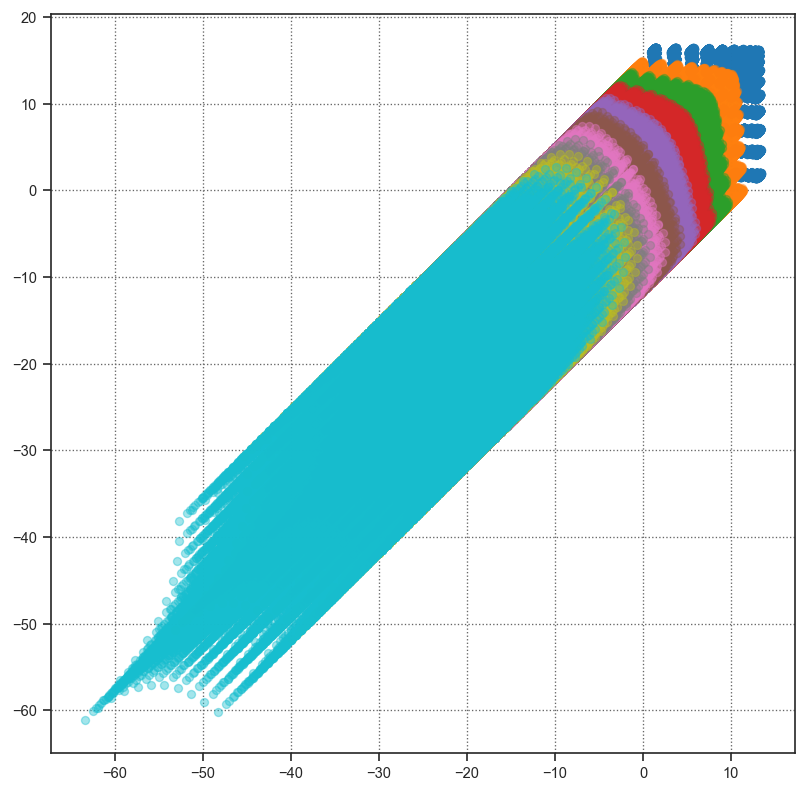

In [47]:
indice_1 = 0
indice_2 = 1
plt.figure(figsize=(8,8),dpi=120)
for time in range(0, game.T, 4):
    scatter_indice_1 = [profile[indice_1,time] for profile in data]
    scatter_indice_2 = [profile[indice_2,time] for profile in data]


    plt.scatter(scatter_indice_1,scatter_indice_2, alpha=0.4)
plt.show()

In [48]:
game.repeated_one_shot_game()
utilities_NE = game.utilities_profiles

In [49]:
F_EX.shape

(37,)

<Figure size 960x960 with 0 Axes>

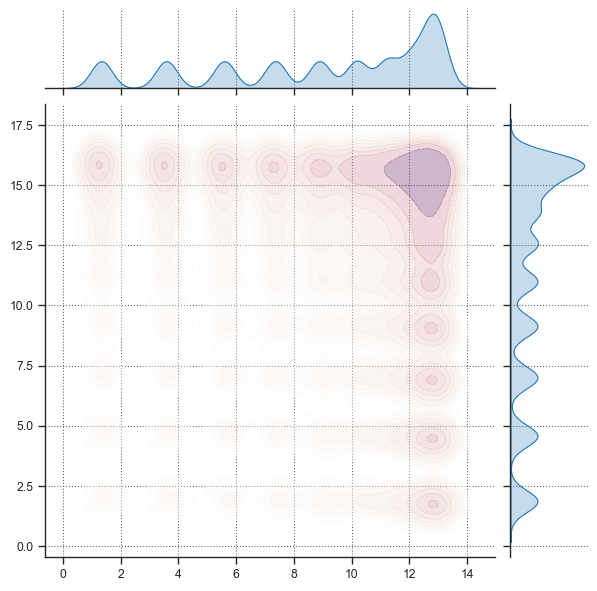

<Figure size 960x960 with 0 Axes>

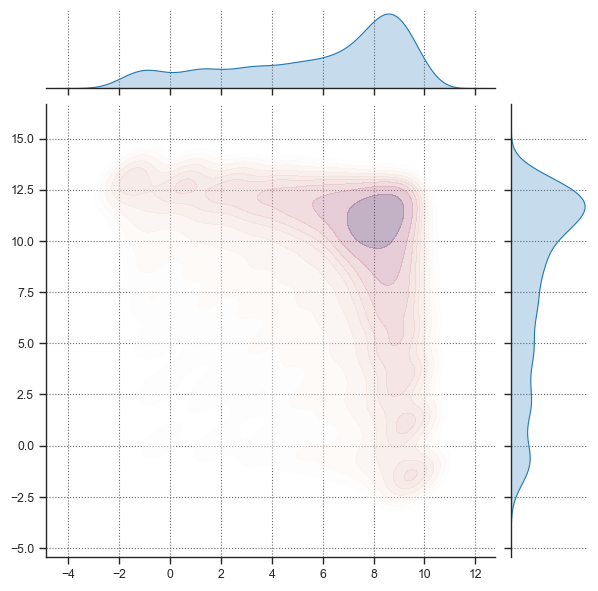

KeyboardInterrupt: 

<Figure size 960x960 with 0 Axes>

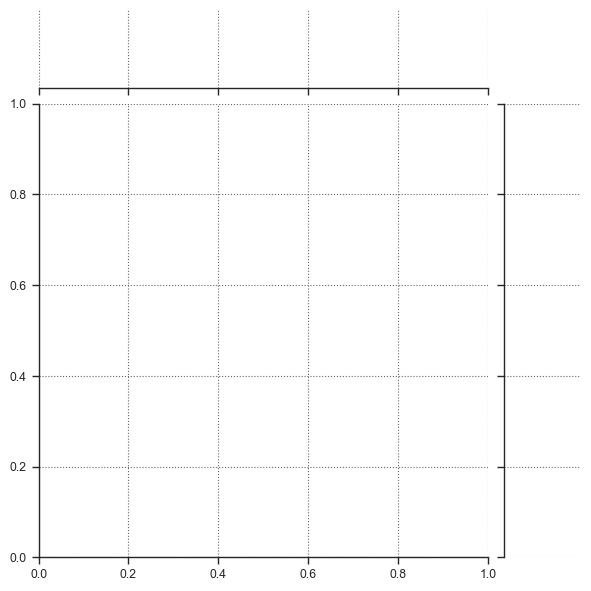

In [51]:
indice_1 = 0
indice_2 = 1

cmap = sns.cubehelix_palette( light=1, as_cmap=True)
for time in np.arange(0, game.T,4):
    plt.figure(figsize=(8,8),dpi=120)
    scatter_indice_1 = [profile[indice_1,time] for profile in data]
    scatter_indice_2 = [profile[indice_2,time] for profile in data]


    sns.jointplot(x=scatter_indice_1,y=scatter_indice_2, alpha=0.4,fill=True, cmap=cmap, kind="kde")
    plt.show()

In [71]:
def pareto_domine(NE_utilities, strat_utilities):
    for i in range(len(NE_utilities)) :
        if NE_utilities[i] > strat_utilities[i] :
            # print(NE_utilities[i], strat_utilities[i])
            return False
            
    return True

def pareto_domine_over_delta(NE_utilities, strat_utilities, delta):
    for i in range(len(NE_utilities)) :
        tsup = min(i + delta, len(NE_utilities))
        if np.sum(NE_utilities[i:tsup]) > np.sum(strat_utilities[i:tsup]) :
            # print(NE_utilities[i], strat_utilities[i])
            return False
            
    return True


def pareto_domine_sum_utility(NE_utilities, strat_utilities):
    for i in range(len(NE_utilities)) :
        if NE_utilities[i] >= strat_utilities[i] :
            # print(NE_utilities[i], strat_utilities[i])
            return False
            
    return True

In [72]:
def pareto_domine_over_time(profile_NE_utilities, profile_strat_utilities):
    n,tmax = np.shape(profile_NE_utilities)
    for time in range(tmax):
        if not pareto_domine(profile_NE_utilities[:,time], profile_strat_utilities[:,time]):
            # print('ok')
            return False
        print('passed')
    return True 

In [73]:
pareto_domiant_delta = []
for profile_strat_utilities in data:
    if pareto_domine_over_delta(utilities_NE, profile_strat_utilities, delta=5):
        pareto_domiant_delta.append(profile_strat_utilities)

In [74]:
len(pareto_domiant_delta)

148909

In [62]:
pareto_domiant = []
for profile_strat_utilities in data:
    if pareto_domine_over_time(utilities_NE, profile_strat_utilities):
        pareto_domiant.append(profile_strat_utilities)

In [64]:
len(pareto_domiant)

0

In [63]:
pareto_domiant_sum = []
for profile_strat_utilities in data:
    if pareto_domine_sum_utility(np.sum(utilities_NE,axis=1), np.sum(profile_strat_utilities,axis=1)):
        pareto_domiant_sum.append(profile_strat_utilities)

In [65]:
len(pareto_domiant_sum)

142938

In [57]:
np.sum(utilities_NE,axis=1)

array([ -786.53547525,  -686.12004068,  -644.62911435, -1397.95378585,
        -379.47012001])

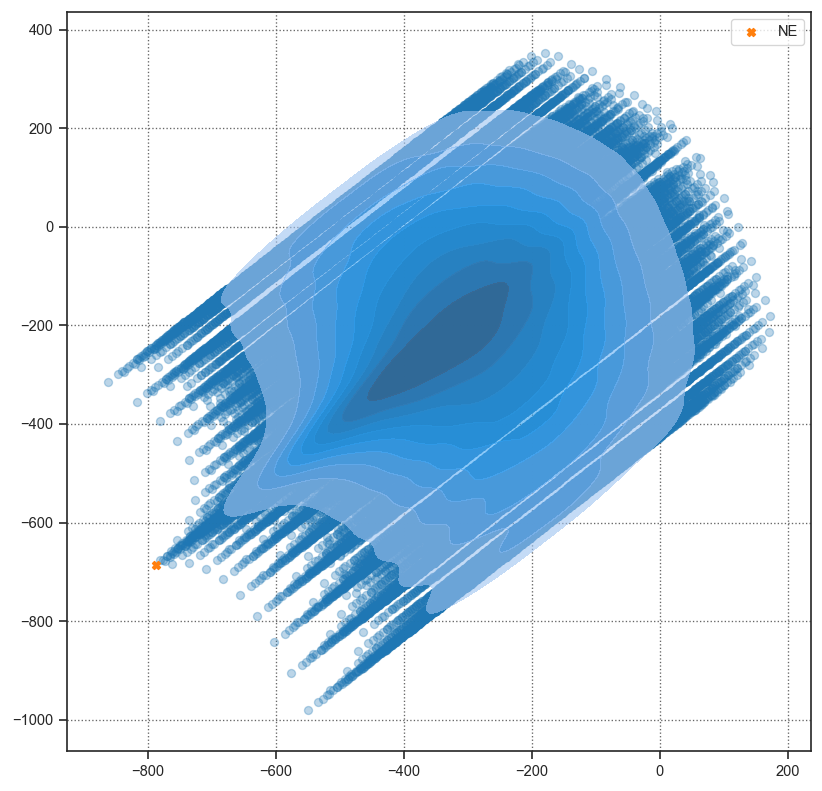

In [75]:
indice_1 = 0
indice_2 = 1
plt.figure(figsize=(8,8),dpi=120)

scatter_indice_1 = [np.sum(profile[indice_1]) for profile in pareto_domiant_delta]
scatter_indice_2 = [np.sum(profile[indice_2]) for profile in pareto_domiant_delta]


plt.scatter(x=scatter_indice_1,y=scatter_indice_2, alpha=0.3)
sns.kdeplot(x=scatter_indice_1,y=scatter_indice_2, alpha=0.6,fill=True)


plt.scatter(np.sum(utilities_NE[indice_1]), np.sum(utilities_NE[indice_2]), label ='NE', marker='X')

plt.legend()
plt.show()

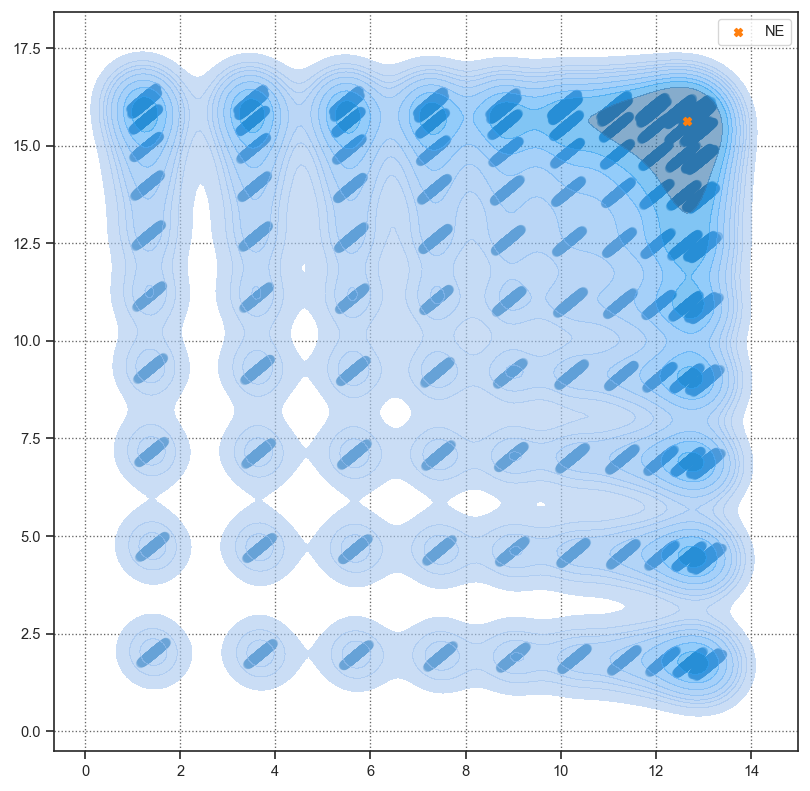

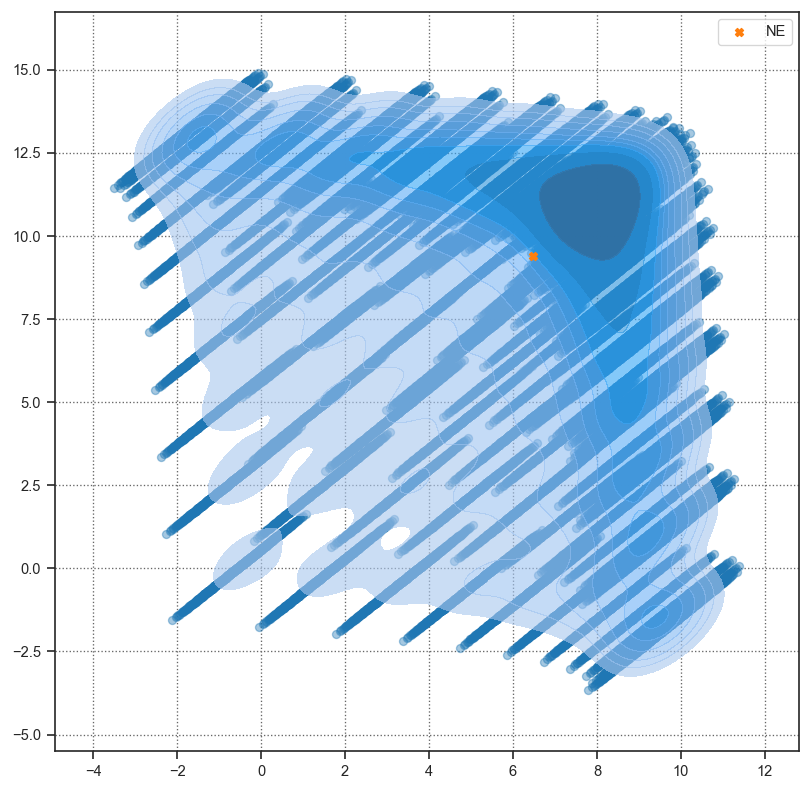

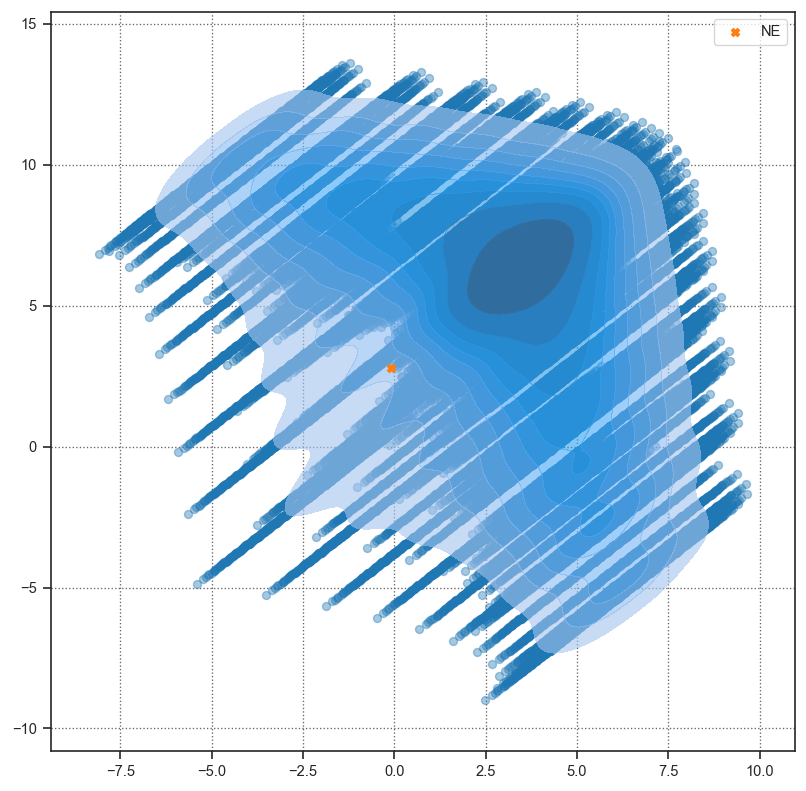

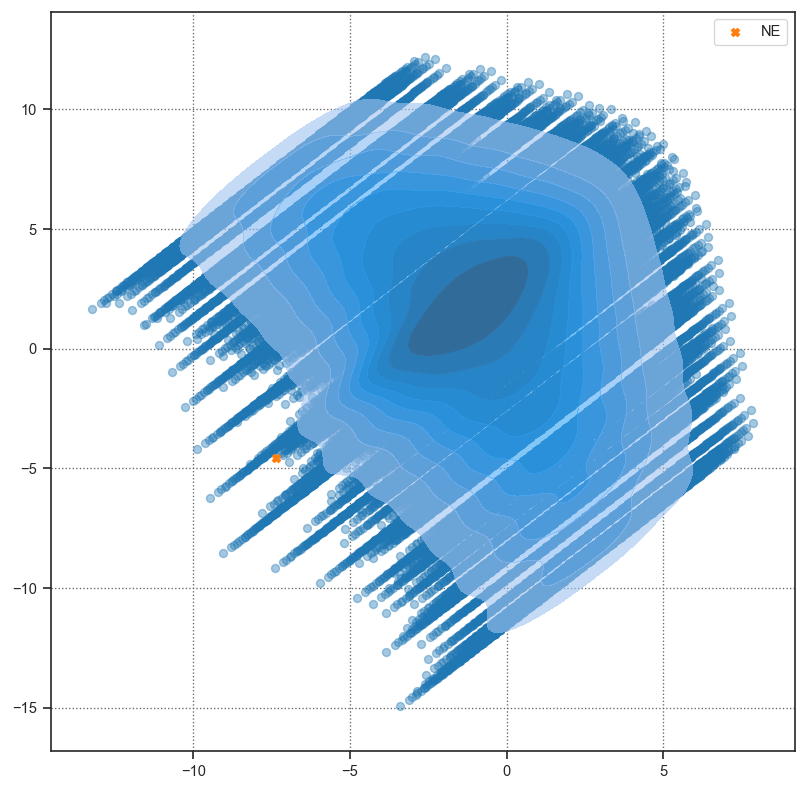

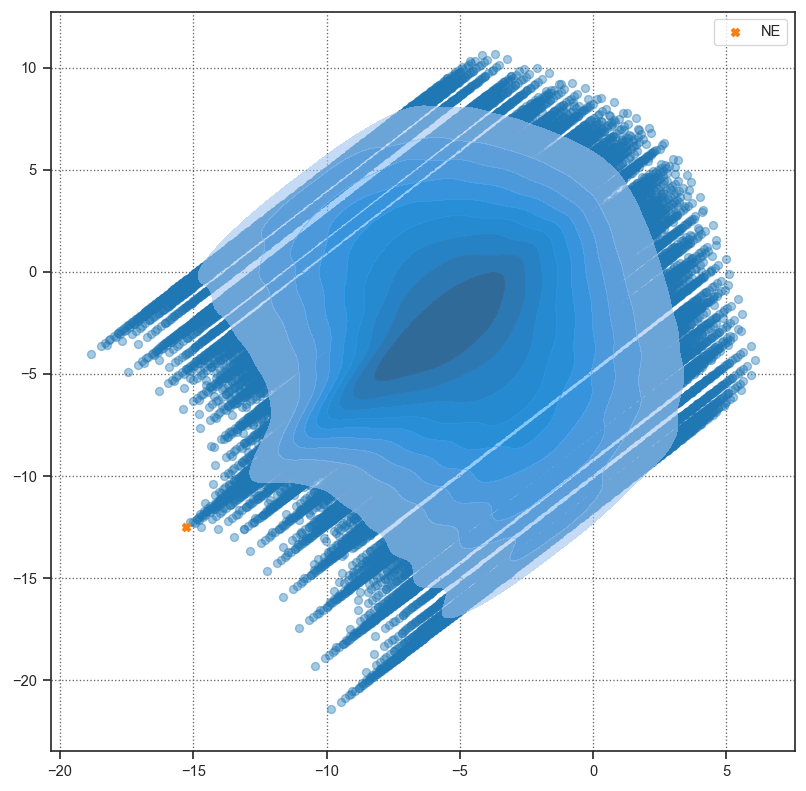

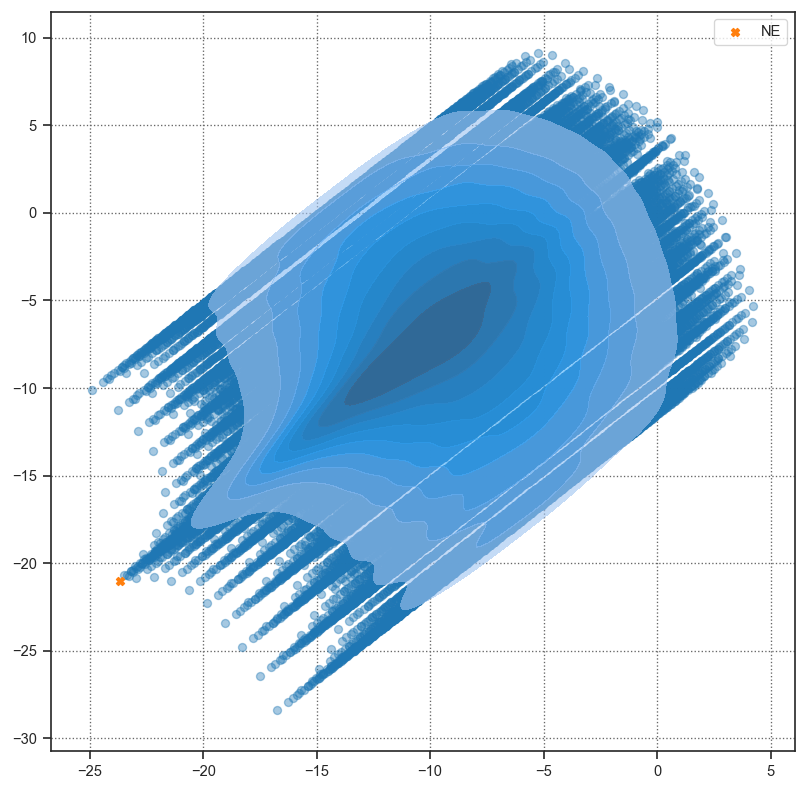

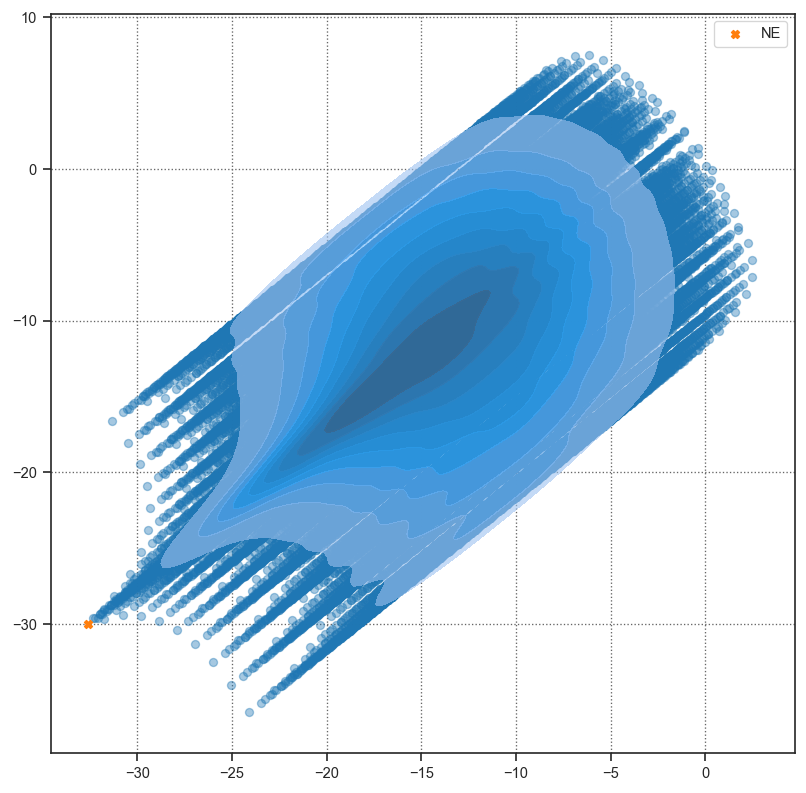

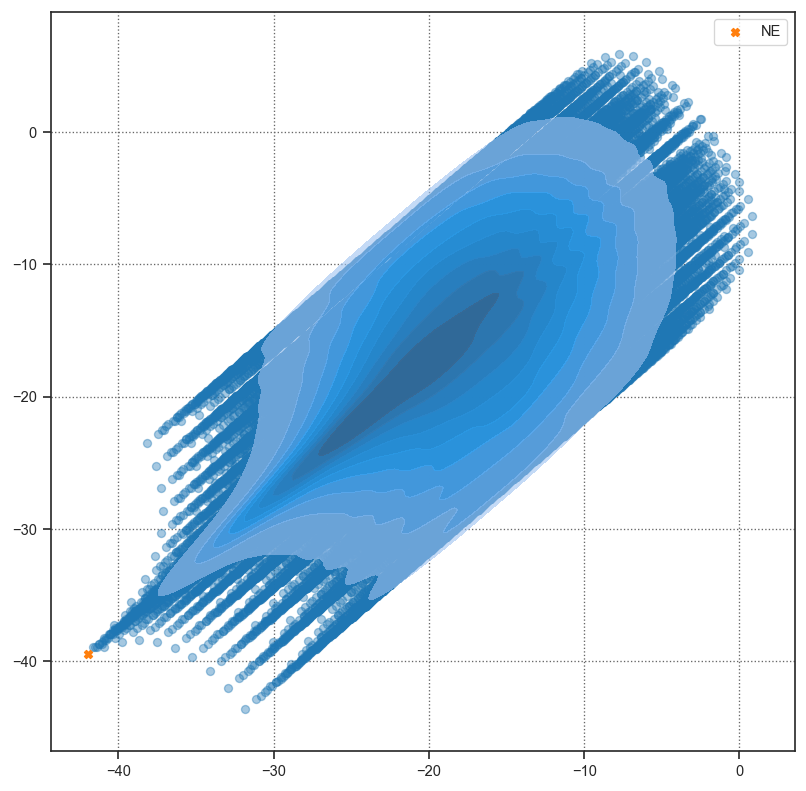

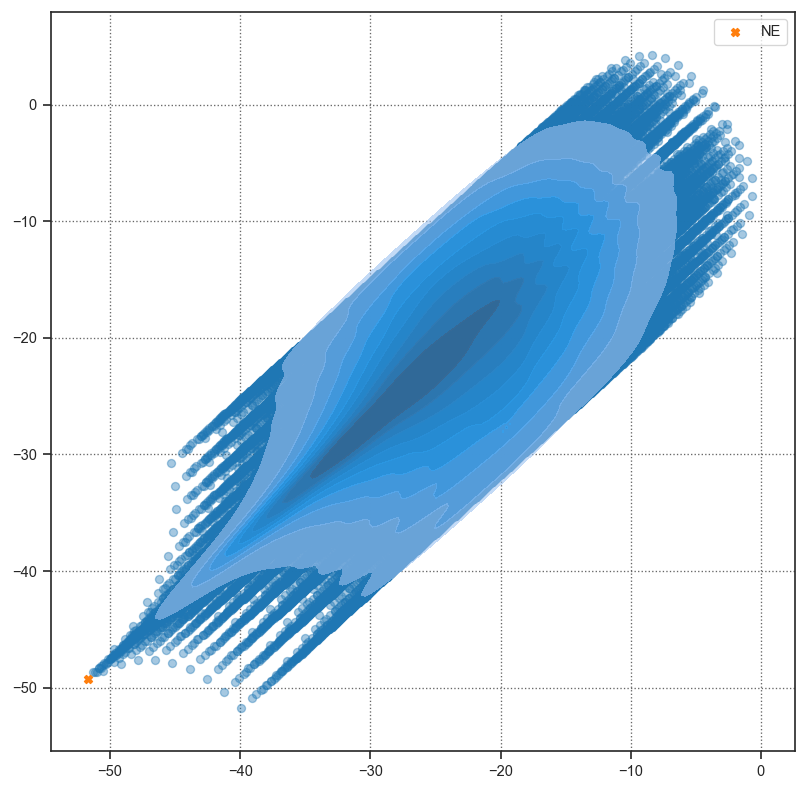

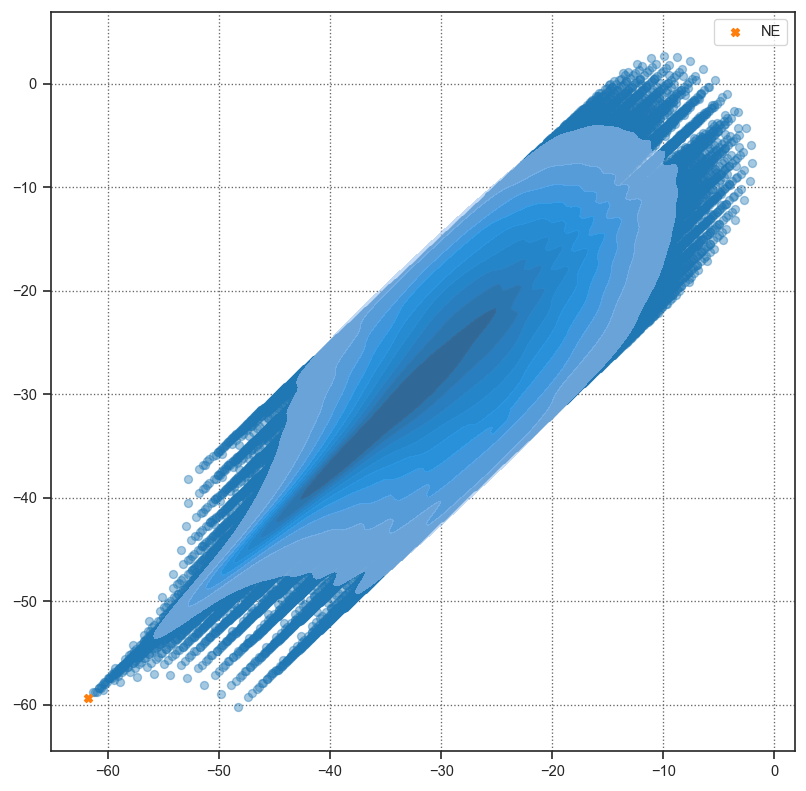

In [77]:
indice_1 = 0
indice_2 = 1
for time in np.arange(0, game.T,4):
    plt.figure(figsize=(8,8),dpi=120)

    scatter_indice_1 = [profile[indice_1,time] for profile in pareto_domiant_delta]
    scatter_indice_2 = [profile[indice_2,time] for profile in pareto_domiant_delta]


    # sns.kdeplot(x=scatter_indice_1,y=scatter_indice_2, alpha=0.4,fill=True)
    plt.scatter(x=scatter_indice_1,y=scatter_indice_2, alpha=0.4)
    sns.kdeplot(x=scatter_indice_1,y=scatter_indice_2, alpha=0.6,fill=True)

    plt.scatter(utilities_NE[indice_1,time], utilities_NE[indice_2,time], label ='NE', marker='X')

    plt.legend()
    plt.show()

In [100]:
len(scatter_indice_1)

6597